# Introdução
 Vamos mergulhar nos dados do Booking. Nosso objetivo? Entender melhor
 o comportamento do cliente e as tendências do mercado de hospedagem. 
 Preparados?
 Vamos lá!


# 1 - Configuração do Ambiente
### Aqui, vamos importar as bibliotecas necessárias. Pandas para manipulação de dados, Matplotlib/Seaborn para visualização, etc.

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from geopy.geocoders import Nominatim
import folium as folium

# 2 - Carregamento dos Dados
### Agora, vamos carregar os dados. Normalmente, usamos Pandas para isso.

In [168]:
# utf-8 nao funcionou, foi usado ISO-8859-1 que cobre a maioria das línguas latinas e europeias
details = pd.read_csv('desafio_details.csv', encoding="ISO-8859-1", sep = ';')
ratings = pd.read_csv('desafio_ratings.csv', encoding="ISO-8859-1", sep = ';' )

# 3 - Análise Exploratória e Preparação dos Datasets
### Vamos dar uma olhada inicial nos dados, investigar padrões, anomalias e tudo mais que pareça interessante.


In [169]:
# retorna as 5 primeiras linhas do dataset
details.head()

,Unnamed: 0,hotel_id,room_id,hotel_name,city_name,accommodation_type,room_name,room_surface_in_m2,room_facilities
0,0,10966441,1096644102,Apto belo e com churrasqueira na varanda VIC0203,Florianópolis,apartment,Apartamento,96.0,"['Taças de vinho', 'Secadora de roupas', 'Guar..."
1,1,10966258,1096625802,Chalés encantadores em Urubici/SC - PAR,Urubici,apartment,Bangalô,65.0,"['Banheiro privativo', 'Geladeira', 'TV', 'Sec..."
2,2,10966118,1096611801,Casa em lindo cond. a 5min da praia PEV105,Ubatuba,holiday_home,Casa de 3 Quartos,220.0,"['Taças de vinho', 'Cozinha', 'Vaso sanitário'..."
3,3,10961514,1096151402,Studio a 2min da UFSC Floripa-SC SSG0304,Florianópolis,apartment,Apartamento,51.0,"['Toalhas', 'Sofá-cama', 'Fogão', 'Chuveiro', ..."
4,4,10960702,1096070202,MGI - Apartamentos proximos da praia do Tororão,Arraial d'Ajuda,apartment,Villa Deluxe,130.0,"['Guarda-roupa ou armário', 'Área para refeiçõ..."


In [170]:
# retorna as 5 primeiras linhas do dataset
ratings.head()

,Unnamed: 0,hotel_id,hotel_name,url,Comodidades,Limpeza,Conforto,Custo-benefício,Localização,Total,WiFi gratuito,number_of_ratings
0,2,10966118,Casa em lindo cond. a 5min da praia PEV105,https://www.booking.com/hotel/br/casa-em-lindo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,5,10959776,Apartamentos no Jardim Goiás Goiânia/GO - THO,https://www.booking.com/hotel/br/apartamentos-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,6,10949139,Casa triplex em condomínio Floripa-SC ALI024,https://www.booking.com/hotel/br/casa-triplex-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,10948439,Apto com piscina no centro de Floripa PCE0406,https://www.booking.com/hotel/br/apto-com-pisc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,10,10943450,Apto espaçoso na beira do lago em Ilhéus ARS0169,https://www.booking.com/hotel/br/apto-espacoso...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [171]:
# retorna o número de linhas e colunas
details_shp = details.shape
ratings_shp = ratings.shape

In [172]:
# quero saber se são valores unicos o hotel_id de cada dataset
details_uniq_id = details['hotel_id'].is_unique
ratings_uniq_id = ratings['hotel_id'].is_unique

In [173]:
# Imprimir os resultados
print("Detalhes do Dataset details:")
print("Número de linhas, colunas:", details_shp)
print("Mostra se são valores únicos  (hotel_id):", details_uniq_id)

print("\nDetalhes do Dataset ratings:")
print("Número de linhas, colunas:", ratings_shp)
print("Mostra se são valores únicos (hotel_id):", ratings_uniq_id)

Detalhes do Dataset details:
Número de linhas, colunas: (1317, 9)
Mostra se são valores únicos  (hotel_id): False

Detalhes do Dataset ratings:
Número de linhas, colunas: (713, 12)
Mostra se são valores únicos (hotel_id): True


In [174]:
# Realizando o merge pelo 'hotel_id', nesse caso, garante que todas as informações dos hotéis sejam mantidas(left)
data = pd.merge(details, ratings, on='hotel_id', how='left', suffixes=('_details', '_ratings'))

In [175]:
# Salvando o dataset resultante
data.to_csv('dataset_merge.csv', index=False)

In [176]:
data.head()

,Unnamed: 0_details,hotel_id,room_id,hotel_name_details,city_name,accommodation_type,room_name,room_surface_in_m2,room_facilities,Unnamed: 0_ratings,hotel_name_ratings,url,Comodidades,Limpeza,Conforto,Custo-benefício,Localização,Total,WiFi gratuito,number_of_ratings
0,0,10966441,1096644102,Apto belo e com churrasqueira na varanda VIC0203,Florianópolis,apartment,Apartamento,96.0,"['Taças de vinho', 'Secadora de roupas', 'Guar...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,10966258,1096625802,Chalés encantadores em Urubici/SC - PAR,Urubici,apartment,Bangalô,65.0,"['Banheiro privativo', 'Geladeira', 'TV', 'Sec...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,10966118,1096611801,Casa em lindo cond. a 5min da praia PEV105,Ubatuba,holiday_home,Casa de 3 Quartos,220.0,"['Taças de vinho', 'Cozinha', 'Vaso sanitário'...",2.0,Casa em lindo cond. a 5min da praia PEV105,https://www.booking.com/hotel/br/casa-em-lindo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,3,10961514,1096151402,Studio a 2min da UFSC Floripa-SC SSG0304,Florianópolis,apartment,Apartamento,51.0,"['Toalhas', 'Sofá-cama', 'Fogão', 'Chuveiro', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,10960702,1096070202,MGI - Apartamentos proximos da praia do Tororão,Arraial d'Ajuda,apartment,Villa Deluxe,130.0,"['Guarda-roupa ou armário', 'Área para refeiçõ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
# Abrindo o dataset com merge
data_merge = pd.read_csv('dataset_merge.csv', encoding="utf-8", sep = ',')

In [178]:
data_merge.head()

,Unnamed: 0_details,hotel_id,room_id,hotel_name_details,city_name,accommodation_type,room_name,room_surface_in_m2,room_facilities,Unnamed: 0_ratings,hotel_name_ratings,url,Comodidades,Limpeza,Conforto,Custo-benefício,Localização,Total,WiFi gratuito,number_of_ratings
0,0,10966441,1096644102,Apto belo e com churrasqueira na varanda VIC0203,Florianópolis,apartment,Apartamento,96.0,"['Taças de vinho', 'Secadora de roupas', 'Guar...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,10966258,1096625802,Chalés encantadores em Urubici/SC - PAR,Urubici,apartment,Bangalô,65.0,"['Banheiro privativo', 'Geladeira', 'TV', 'Sec...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,10966118,1096611801,Casa em lindo cond. a 5min da praia PEV105,Ubatuba,holiday_home,Casa de 3 Quartos,220.0,"['Taças de vinho', 'Cozinha', 'Vaso sanitário'...",2.0,Casa em lindo cond. a 5min da praia PEV105,https://www.booking.com/hotel/br/casa-em-lindo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,3,10961514,1096151402,Studio a 2min da UFSC Floripa-SC SSG0304,Florianópolis,apartment,Apartamento,51.0,"['Toalhas', 'Sofá-cama', 'Fogão', 'Chuveiro', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,10960702,1096070202,MGI - Apartamentos proximos da praia do Tororão,Arraial d'Ajuda,apartment,Villa Deluxe,130.0,"['Guarda-roupa ou armário', 'Área para refeiçõ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
data_shp = data_merge.shape
# Imprimir os resultados
print("Detalhes do Dataset data:")
print("Número de linhas, colunas:", data_shp)

Detalhes do Dataset data:
Número de linhas, colunas: (1317, 20)


In [180]:
# Listando nome das colunas
data_merge.columns

Index(['Unnamed: 0_details', 'hotel_id', 'room_id', 'hotel_name_details',
       'city_name', 'accommodation_type', 'room_name', 'room_surface_in_m2',
       'room_facilities', 'Unnamed: 0_ratings', 'hotel_name_ratings', 'url',
       'Comodidades', 'Limpeza', 'Conforto', 'Custo-benefício', 'Localização',
       'Total', 'WiFi gratuito', 'number_of_ratings'],
      dtype='object')

In [181]:
# Renomeando as Colunas
data_merge.rename(columns={'Unnamed: 0_details': 'ordem', 'Unnamed: 0_ratings':'ratings'}, inplace=True)
# Renomeando as colunas para letras minúsculas e substituindo espaços por underscore
data_merge.columns = [col.lower().replace(' ', '_').replace('-', '_') for col in data_merge.columns]

# Exibindo as novas colunas
print(data_merge.columns)

Index(['ordem', 'hotel_id', 'room_id', 'hotel_name_details', 'city_name',
       'accommodation_type', 'room_name', 'room_surface_in_m2',
       'room_facilities', 'ratings', 'hotel_name_ratings', 'url',
       'comodidades', 'limpeza', 'conforto', 'custo_benefício', 'localização',
       'total', 'wifi_gratuito', 'number_of_ratings'],
      dtype='object')


### Pergunta: 1 - Ordene as cidades em ordem crescente de número de listings;

In [182]:
cidade_ord_cresc_list = data_merge['city_name'].value_counts().sort_values()
cidade_ordem = cidade_ord_cresc_list.reset_index()
cidade_ordem.columns = ['cidade', 'num_listings']
print(cidade_ordem)

                 cidade  num_listings
0              São José             1
1              Camboriú             1
2              Bertioga             1
3            Meia Praia             1
4           Pirenópolis             1
5         Águas Brancas             1
6            Taguatinga             1
7          Caldas Novas             1
8         Praia do Rosa             1
9              Trancoso             2
10               Maceió             2
11         Águas Claras             2
12           Petrópolis             3
13       Angra dos Reis             3
14              Urubici             3
15               Ilhéus             4
16          Hidrolândia             4
17  Santa Cruz Cabrália             4
18               Búzios             5
19             Garopaba             6
20      Poços de Caldas             8
21             Brasília             8
22      Arraial d'Ajuda             9
23               Canela             9
24           Porto Belo            10
25          

C:\Users\isisd\AppData\Local\Temp\ipykernel_17948\3437861012.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'num_listings', y='cidade', data=top_10_cidades_listings,palette='viridis')


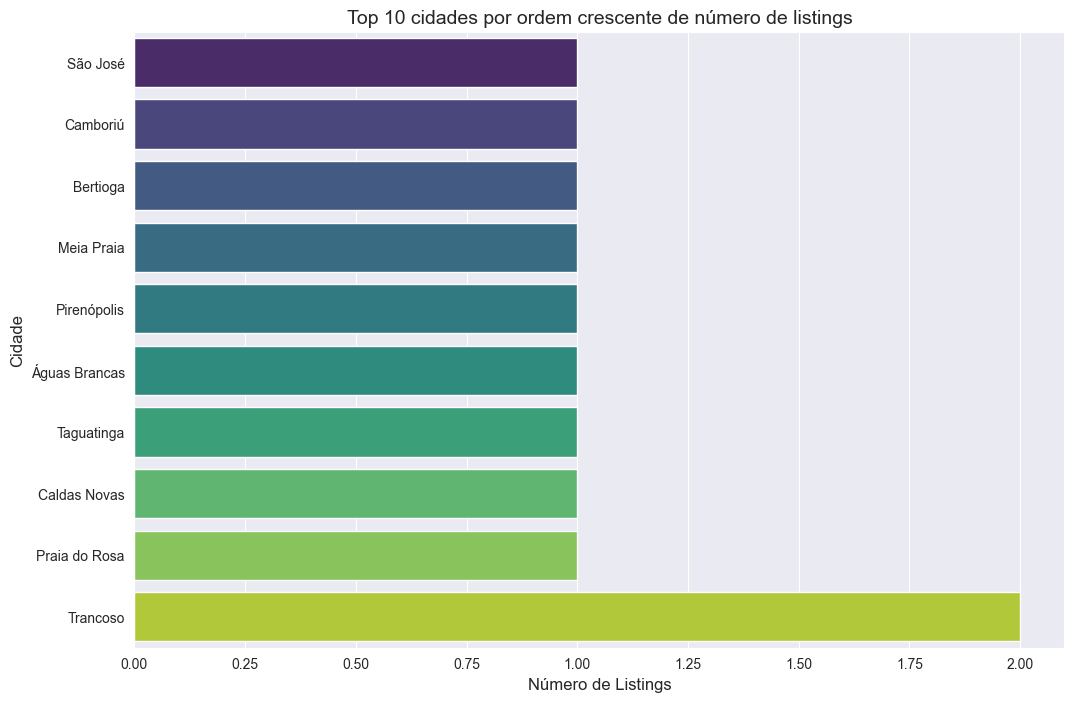

In [183]:
# Selecionando as 10 primeiras cidades
top_10_cidades_listings = cidade_ordem.head(10)

# Criando um gráfico de barras com Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x= 'num_listings', y='cidade', data=top_10_cidades_listings,palette='viridis')

# Adicionando título e labels
plt.title('Top 10 cidades por ordem crescente de número de listings', fontsize=14)
plt.xlabel('Número de Listings', fontsize=12)
plt.ylabel('Cidade', fontsize=12)

# Mostrando o gráfico
plt.show()

### Pergunta: 2 - Ordene as cidades em ordem decrescente de metros quadrados;

In [184]:
# Agrupando por cidade e calculando a média dos metros quadrados
cidade_metros_mean = data_merge.groupby('city_name')['room_surface_in_m2'].mean()

#colocando em ordem decrescente
cidade_metros_mean = cidade_metros_mean.sort_values(ascending=False)

#visualizando
cidade_metros_mean = cidade_metros_mean.reset_index()
cidade_metros_mean.columns = ['cidade', 'media_m²']

cidade_metros_mean

,cidade,media_m²
0,Trancoso,192.000000
1,Búzios,174.800000
2,Angra dos Reis,160.000000
3,Bertioga,156.000000
4,Porto Seguro,155.327692
5,Garopaba,132.666667
6,Pirenópolis,130.000000
7,Petrópolis,127.333333
8,Porto Belo,126.100000
9,Itapema,116.081818


C:\Users\isisd\AppData\Local\Temp\ipykernel_17948\1753975510.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'media_m²', y='cidade', data = top_10_cidades_metros,palette='viridis')


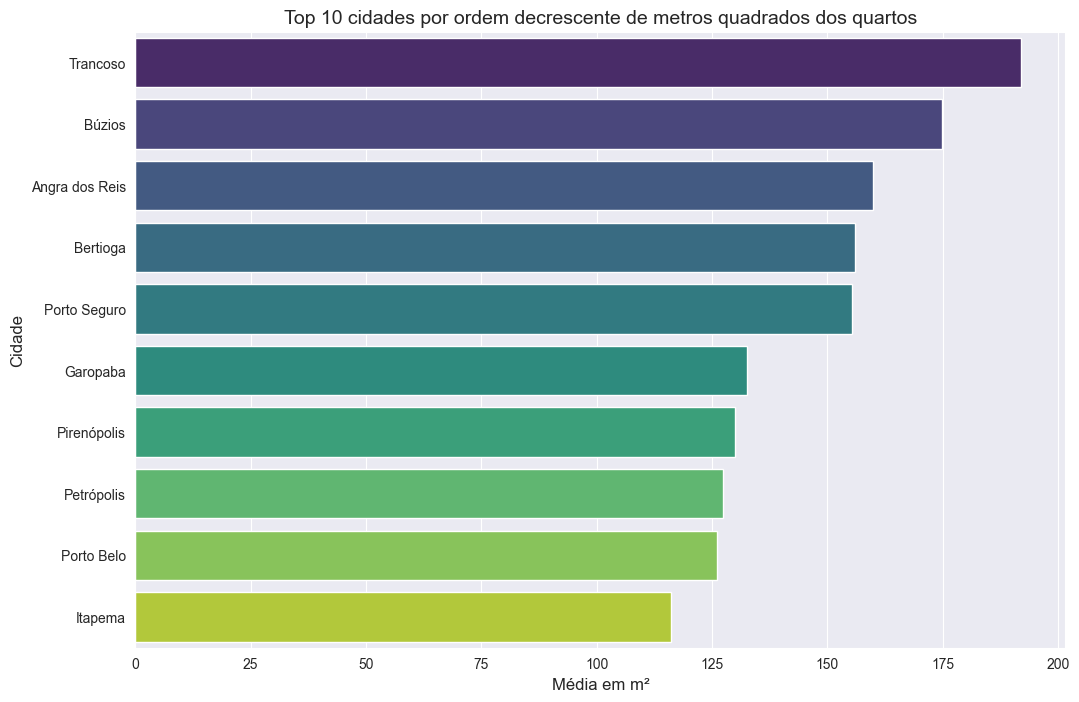

In [185]:
# Selecionando as 10 primeiras cidades
top_10_cidades_metros = cidade_metros_mean.head(10)

# Criando um gráfico de barras com Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x= 'media_m²', y='cidade', data = top_10_cidades_metros,palette='viridis')

# Adicionando título e labels
plt.title('Top 10 cidades por ordem decrescente de metros quadrados dos quartos', fontsize=14)
plt.xlabel('Média em m²', fontsize=12)
plt.ylabel('Cidade', fontsize=12)

# Mostrando o gráfico
plt.show()

### Pergunta 3: Quais cidades têm mais avaliações?

In [186]:
# Agrupando por cidade e somando o número de avaliações
# obs: nessa parte, peguei o valor único pq ao fazer o merge ele repetiu as avaliacoes em hoteis com id_hotel igual.

# Removendo duplicatas com base em hotel_id para obter valores únicos
val_unicos = data_merge.drop_duplicates(subset='hotel_id')

# Agrupando por cidade e somando o número de avaliações
cidade_avali = val_unicos.groupby('city_name')['number_of_ratings'].sum()

# Ordenando as cidades em ordem decrescente com base no número total de avaliações
cidade_avali = cidade_avali.sort_values(ascending=False)

# Convertendo o resultado em um DataFrame para uma melhor visualização
cidade_avali_df = cidade_avali.reset_index()
cidade_avali_df.columns = ['cidade', 'total_de_avaliacoes']

# Vizualizando
cidade_avali_df.head()


,cidade,total_de_avaliacoes
0,Florianópolis,3264.0
1,Campos do Jordão,135.0
2,Bombinhas,128.0
3,Anitápolis,78.0
4,Balneário Camboriú,54.0


C:\Users\isisd\AppData\Local\Temp\ipykernel_17948\3521281150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='cidade', y='total_de_avaliacoes', data=top_05_cid_aval, palette='viridis')


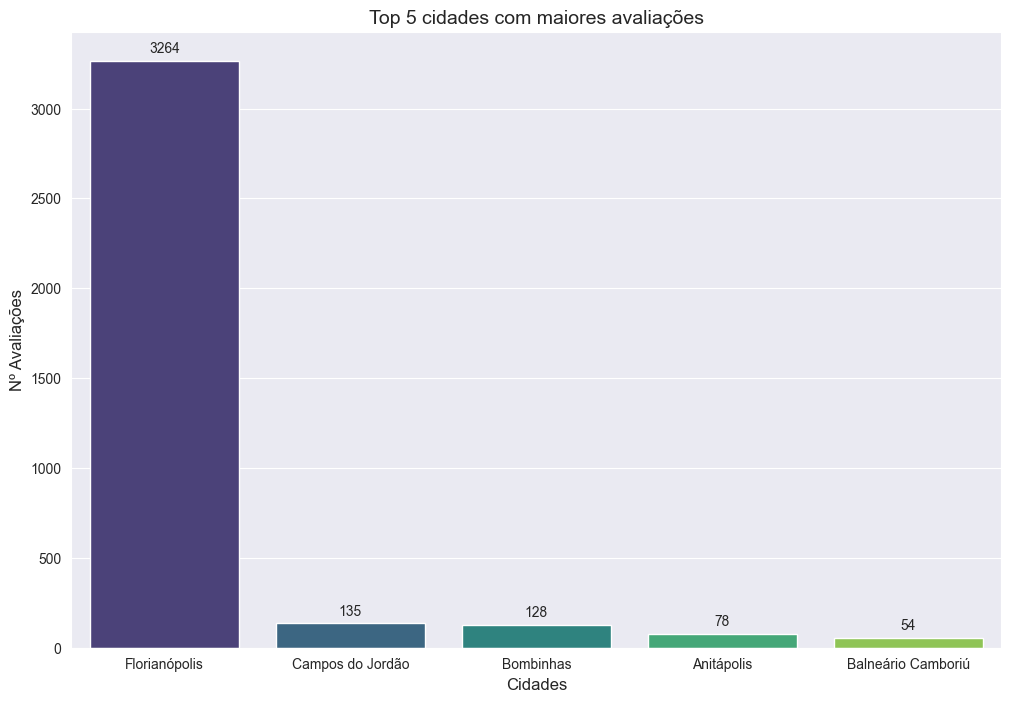

In [187]:
# Selecionando as 5 primeiras cidades
top_05_cid_aval = cidade_avali_df.head(5)

# Criando um gráfico de barras com Seaborn
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='cidade', y='total_de_avaliacoes', data=top_05_cid_aval, palette='viridis')

# Adicionando números em cima das barras
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

# Adicionando título e labels
plt.title('Top 5 cidades com maiores avaliações', fontsize=14)
plt.xlabel('Cidades', fontsize=12)
plt.ylabel('Nº Avaliações', fontsize=12)

# Mostrando o gráfico
plt.show()


### Pergunta 4: Quais cidades têm a maior média de avaliações? E a menor média?
## a. Existe alguma explicação para isso? Conjecture.


In [191]:
#primeiro, filtro o dataset para que o Total>0, pois se nao tem avaliacao, nao podemos iniciamente inferir algo
cid_media = data_merge[data_merge['total'] > 0]
cid_media = cid_media.groupby('city_name')['total'].mean()
cid_media = cid_media.reset_index()
cid_media.columns = ['cidade', 'media_avaliacao']
cid_media

,cidade,media_avaliacao
0,Angra dos Reis,10.000000
1,Anitápolis,9.400000
2,Balneário Camboriú,8.150000
3,Bombinhas,8.867647
4,Brasília,10.000000
5,Cabo Frio,9.500000
6,Camboriú,1.000000
7,Campos do Jordão,9.100000
8,Canela,9.000000
9,Florianópolis,8.782000


In [192]:
geolocator = Nominatim(user_agent="geoapiExercises")

# Função para obter latitude e longitude
def get_lat_lon(city_name):
    location = geolocator.geocode(city_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

cid_media['latitude'], cid_media['longitude'] = zip(*cid_media['cidade'].apply(get_lat_lon))


print(cid_media.head())

               cidade  media_avaliacao   latitude  longitude
0      Angra dos Reis        10.000000 -23.006397 -44.316326
1          Anitápolis         9.400000 -27.904118 -49.128740
2  Balneário Camboriú         8.150000 -26.992439 -48.633978
3           Bombinhas         8.867647 -27.151916 -48.487569
4            Brasília        10.000000 -10.333333 -53.200000


In [203]:

    # Criando o mapa
    mapa = folium.Map(location=[-15.788497, -47.879873], zoom_start=4)

    # Filtrando os dados
    menor_que_8 = cid_media[(cid_media['media_avaliacao'] > 0) & (cid_media['media_avaliacao'] <= 8)]
    maior_que_8 = cid_media[(cid_media['media_avaliacao'] > 0) & (cid_media['media_avaliacao'] >= 8)]

    # Adicionando marcadores
    for index, row in menor_que_8.iterrows():
        folium.Marker(
            [row['latitude'], row['longitude']],
            popup=f"{row['cidade']}: {row['media_avaliacao']:.2f}",
            icon=folium.Icon(color='red')
        ).add_to(mapa)

    for index, row in maior_que_8.iterrows():
        folium.Marker(
            [row['latitude'], row['longitude']],
            popup=f"{row['cidade']}: {row['media_avaliacao']:.2f}",
            icon=folium.Icon(color='green')
        ).add_to(mapa)
    mapa.save('mapa.html')
    # Exibindo o mapa
    mapa



### Pergunta 5: Existem correlações entre as características de um anúncio e a sua localização? a. Quais? Explique.
